In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import minimize

%matplotlib inline

In [2]:
#Recebe DF com preços e devolve retorno médio anual
def in_return_cov(df): 
    price = df.copy()
    price = (price / price.shift(1)) -1
    price.iloc[0,:] = 0 # Primeira linha = 0     
    
    returns = np.matrix(price)
    mean_returns = np.mean(returns, axis = 0)
    
    annual_returns = np.array([])
    for i in range(len(np.transpose(mean_returns))):
        annual_returns = np.append(annual_returns,(mean_returns[0,i]+1)**252-1)   
    
    cov = price.cov()*252    
    return (annual_returns, np.matrix(cov))

#Carrega tabela de preços e apenas mantem os dias em que o índice foi negociado. 
def load_prices(symbols,
                start_date,
                end_date):
    
    dates = pd.date_range(start_date, end_date)
    dfBase = pd.DataFrame(index = dates)    
     
    for symbol in symbols:
        df_temp = pd.read_csv('{}.csv'.format(symbol), index_col = "Date", parse_dates = True,
                              usecols = ['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        dfBase = dfBase.join(df_temp)
    
    dfBase.fillna(method = "ffill", inplace = True)
    dfBase.fillna(method = "bfill", inplace = True)
    
    return dfBase 

In [6]:
symbols = ['ABEV3','BBAS3','GGBR4','ITSA4','ITUB4','PETR4','VALE3']
start_date = '2006-01-01'
end_date = '2018-12-31'

In [7]:
data = load_prices(symbols, start_date, end_date)

In [8]:
data.head()

,ABEV3,BBAS3,GGBR4,ITSA4,ITUB4,PETR4,VALE3
2006-01-01,0.553879,8.275678,9.302610,2.566888,7.026229,14.286000,15.917069
2006-01-02,0.553879,8.275678,9.302610,2.566888,7.026229,14.286000,15.917069
2006-01-03,0.564956,8.456896,9.708132,2.653027,7.219321,14.736072,16.548435
2006-01-04,0.569779,9.604621,9.863129,2.721935,7.424882,14.807335,16.805967
2006-01-05,0.572710,9.890524,9.684230,2.670252,7.375049,14.777330,16.781046


In [9]:
data.pct_change(1).mean()

ABEV3    0.007547
BBAS3    0.000621
GGBR4    0.000371
ITSA4    0.000661
ITUB4    0.000515
PETR4    0.000369
VALE3    0.000497
dtype: float64

In [10]:
data.pct_change(1).corr()

,ABEV3,BBAS3,GGBR4,ITSA4,ITUB4,PETR4,VALE3
ABEV3,1.000000,0.022005,0.018881,0.012270,0.022370,0.018428,0.022873
BBAS3,0.022005,1.000000,0.457630,0.465091,0.694737,0.543464,0.433777
GGBR4,0.018881,0.457630,1.000000,0.363032,0.503275,0.528158,0.641166
ITSA4,0.012270,0.465091,0.363032,1.000000,0.623228,0.386452,0.328114
ITUB4,0.022370,0.694737,0.503275,0.623228,1.000000,0.534048,0.500870
PETR4,0.018428,0.543464,0.528158,0.386452,0.534048,1.000000,0.527013
VALE3,0.022873,0.433777,0.641166,0.328114,0.500870,0.527013,1.000000


In [15]:
data.pct_change(1).head()

,ABEV3,BBAS3,GGBR4,ITSA4,ITUB4,PETR4,VALE3
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.019999,0.021898,0.043592,0.033558,0.027482,0.031504,0.039666
2006-01-04,0.008537,0.135715,0.015966,0.025973,0.028474,0.004836,0.015562
2006-01-05,0.005144,0.029767,-0.018138,-0.018988,-0.006712,-0.002026,-0.001483


In [13]:
log_return_df = np.log(data/data.shift(1))
log_return_df.head()

,ABEV3,BBAS3,GGBR4,ITSA4,ITUB4,PETR4,VALE3
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.019802,0.021661,0.042669,0.033007,0.027111,0.031018,0.038899
2006-01-04,0.008501,0.127262,0.015840,0.025642,0.028076,0.004824,0.015442
2006-01-05,0.005131,0.029333,-0.018305,-0.019170,-0.006734,-0.002028,-0.001484


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

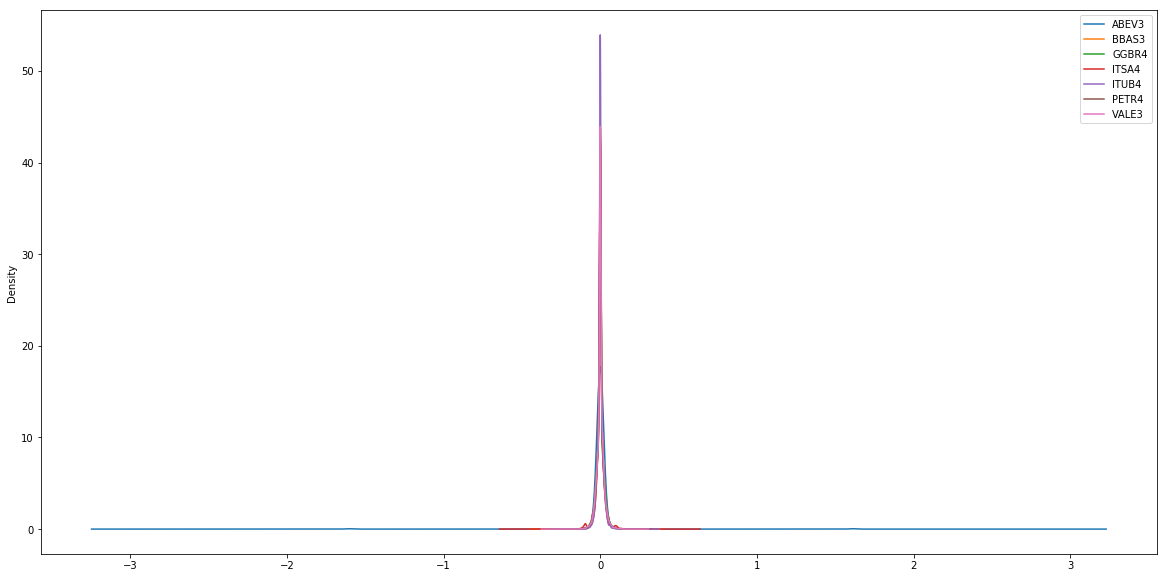

In [25]:
log_return_df.plot.kde(figsize=(20,10))
plt.tight_layout

In [27]:
log_return_df.cov()*252

,ABEV3,BBAS3,GGBR4,ITSA4,ITUB4,PETR4,VALE3
ABEV3,2.800278,0.021369,0.016309,0.008152,0.014344,0.017703,0.020445
BBAS3,0.021369,0.129430,0.061247,0.069002,0.073859,0.072496,0.055280
GGBR4,0.016309,0.061247,0.137559,0.055387,0.055396,0.072625,0.084760
ITSA4,0.008152,0.069002,0.055387,0.168367,0.075760,0.058556,0.047963
ITUB4,0.014344,0.073859,0.055396,0.075760,0.087237,0.058423,0.052621
PETR4,0.017703,0.072496,0.072625,0.058556,0.058423,0.136977,0.069147
VALE3,0.020445,0.055280,0.084760,0.047963,0.052621,0.069147,0.126844


In [32]:
weigth = np.array(np.random.random(7))
weigth = weigth/np.sum(weigth)

display(pd.DataFrame({'Peso no portfolio %':weigth*100}, index = symbols).T)

,ABEV3,BBAS3,GGBR4,ITSA4,ITUB4,PETR4,VALE3
Peso no portfolio %,15.345665,5.527735,22.748002,21.089058,7.791899,22.492932,5.004709


In [36]:
#Expected portfolio return
annualized_expec_ret = np.sum(log_return_df.mean()*weigth*252)
annualized_expec_ret

0.0704174236037841

In [37]:
#Expected portfolio volatility

annualized_expec_vol = np.sqrt(np.dot(weigth.T,np.dot(log_return_df.cov()*252,weigth)))
annualized_expec_vol

0.35810241033353946

In [38]:
#Sharpe Ratio

RF = 0.06 #year
SR = (annualized_expec_ret-RF)/annualized_expec_vol
SR

0.029090626879839286

In [40]:
np.random.seed(99)
ports = 3000

all_weights = np.zeros((ports,len(symbols)))
ret_col = np.zeros(ports)
vol_col = np.zeros(ports)
SR_col = np.zeros(ports)

for i in range(ports):
    weigth = np.array(np.random.random(len(symbols)))
    weigth = weigth/np.sum(weigth)
    
    all_weights[i] = weigth
    ret_col[i] = np.sum(log_return_df.mean()*weigth*252)
    vol_col[i] = np.sqrt(np.dot(weigth.T,np.dot(log_return_df.cov()*252,weigth)))
    SR_col[i] = (ret_col[i] - RF) / vol_col[i]

In [41]:
SR_col.max()

0.09819924943233546

In [42]:
SR_col.argmax()

919

In [43]:
all_weights[919]

array([0.11016622, 0.30359556, 0.00795045, 0.30736082, 0.117188  ,
       0.01222528, 0.14151367])

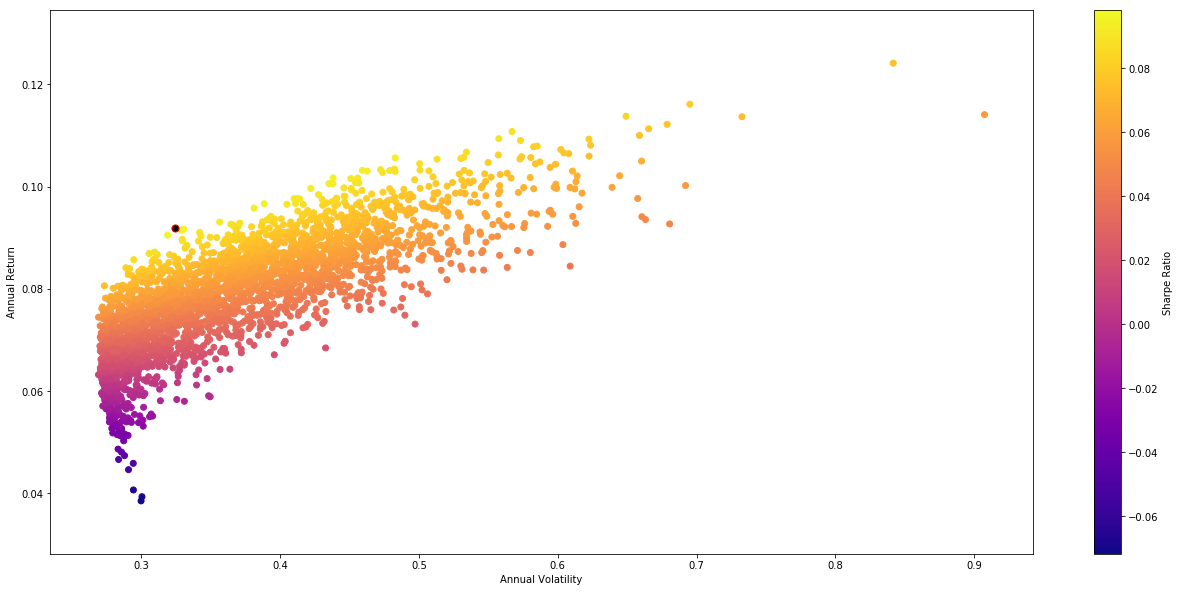

In [45]:
plt.figure(figsize=(22,10))
plt.scatter(vol_col, ret_col, c=SR_col, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.scatter(vol_col[919], ret_col[919], c='black', s=50, edgecolors='red')

In [70]:
def ret_vol_sr(w):
    ret = np.sum(log_return_df.mean()*w*252)
    vol = np.sqrt(np.dot(w.T,np.dot(log_return_df.cov()*252,w)))
    sr = (ret - RF) / vol
    return [ret,vol,sr]    

def neg_sharpe(w):
    return ret_vol_sr(w)[2] * -1

In [71]:
def check_sum(weights):
    return np.sum(weights) - 1

constr = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1),
         (0,1),
         (0,1),
         (0,1),
         (0,1),
         (0,1),
         (0,1))
guess = [.1,.1,.1,.1,.1,.1,.4]

In [72]:
result_opt = minimize(fun=neg_sharpe,
                      x0=guess,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constr)

In [73]:
result_opt

     fun: -0.11624534597843122
     jac: array([-0.18313933, -0.18190927, -0.01796692, -0.17931187, -0.18181482,
       -0.01091689, -0.13396425])
 message: 'Optimization terminated successfully.'
    nfev: 145
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([1.12024362e-01, 3.92048918e-01, 0.00000000e+00, 1.85398571e-16,
       4.95926720e-01, 2.07082615e-17, 2.81892565e-17])

In [74]:
ret_vol_sr(result_opt.x)

[0.09832259264207768, 0.329669909100604, 0.11624534597843122]

In [76]:
front_y = np.linspace(0,0.15,100)

In [77]:
def minimize_vol(w):
    return ret_vol_sr(w)[1]

In [79]:
front_vol = []
for j in front_y:
    const = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda x: ret_vol_sr(x)[0] - j})
    result = minimize(fun=minimize_vol,
                      x0=guess,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=const)
    front_vol.append(result['fun'])

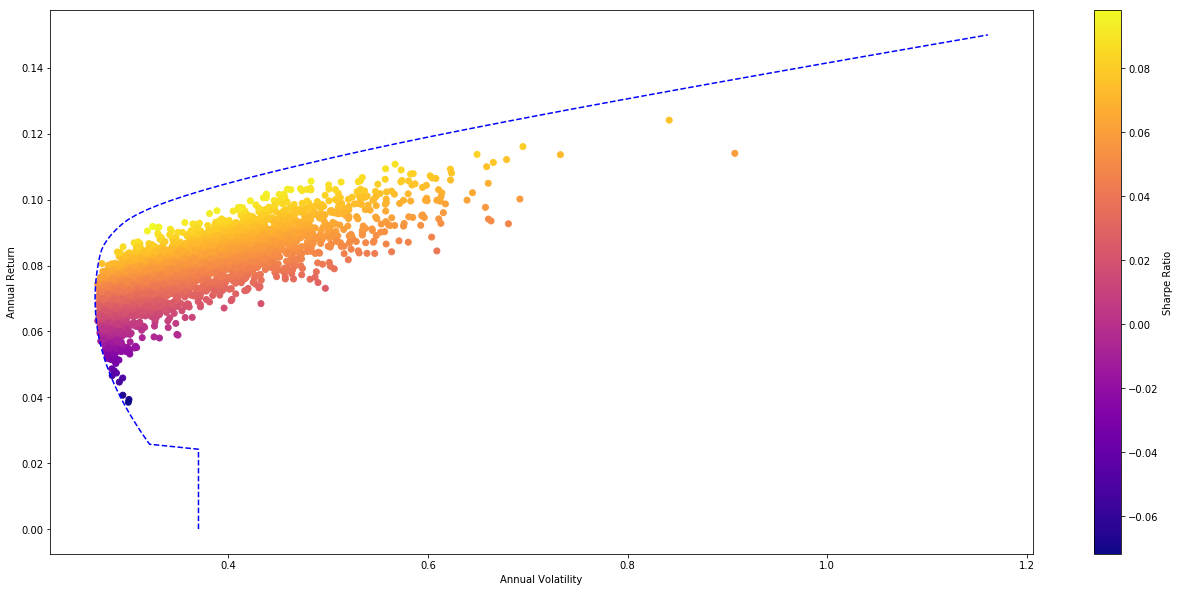

In [81]:
plt.figure(figsize=(22,10))
plt.scatter(vol_col, ret_col, c=SR_col, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')

plt.plot(front_vol, front_y, 'b--')
